In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [4]:
import pandas  as pd

df = pd.read_csv('brief_assurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [23]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [4]:
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


selon les descriptions stastique, nous n'avons pas constacte les valeur aberrants ou manquantes. pour max bmi de 53.13 correspondre a un homme de 180cm et 170kg. reste une valeur non aberrants. même conculusion pour nombre d'enfants et age .
donc notre dataframe est prêt à emplois

In [10]:
df_charge_decroissant = df.sort_values("charges", ascending=False)
df_charge_decroissant.head(20)


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914
1241,64,male,36.960,2,yes,southeast,49577.66240
1062,59,male,41.140,1,yes,southeast,48970.24760
488,44,female,38.060,0,yes,southeast,48885.13561


In [11]:
df_charge_croissant = df.sort_values("charges")
df_charge_croissant.head(20)

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110
194,18,male,34.43,0,no,southeast,1137.4697
866,18,male,37.29,0,no,southeast,1141.4451
781,18,male,41.14,0,no,southeast,1146.7966
442,18,male,43.01,0,no,southeast,1149.3959
1317,18,male,53.13,0,no,southeast,1163.4627


/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_91407/18522914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) #rouge = grosse corelation  #noir = pas de corelation


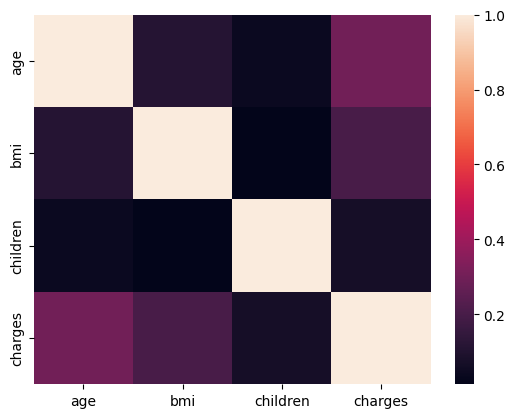

In [14]:
sns.heatmap(df.corr()) #rouge = grosse corelation  #noir = pas de corelation
plt.show()

In [15]:
df_corr = df.corrwith(df["charges"])
df_corr.sort_values(ascending=False,inplace=True)
df_corr

/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_91407/1147709766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corrwith(df["charges"])


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
dtype: float64

In [16]:
df_dum = pd.get_dummies(df)
df_dum

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [17]:
df_corr_dummie = df_dum.corrwith(df["charges"])
df_corr_dummie.sort_values(ascending=False,inplace=True)
df_corr_dummie

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
smoker_no          -0.787251
dtype: float64

on constacte une correlation important pour les fumeurs ou non , et une legere correlation entre age et bmi.  un tres faible corelation pour region, sex et nombres enfant.

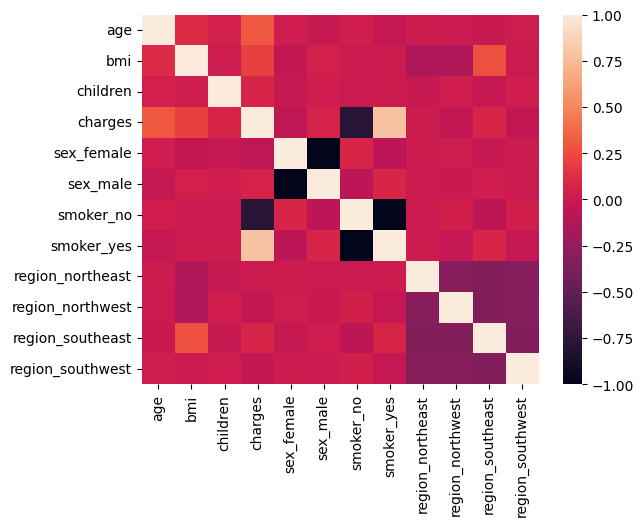

In [18]:
sns.heatmap(df_dum.corr()) #rouge = grosse corelation  #noir = pas de corelation
plt.show()

In [19]:
df_ready =df_dum


In [20]:
df_ready.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df_ready.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
5,31,25.740,0,3756.62160,1,0,1,0,0,0,1,0
6,46,33.440,1,8240.58960,1,0,1,0,0,0,1,0
7,37,27.740,3,7281.50560,1,0,1,0,0,1,0,0
8,37,29.830,2,6406.41070,0,1,1,0,1,0,0,0
9,60,25.840,0,28923.13692,1,0,1,0,0,1,0,0


In [32]:
X = df_ready['smoker_no']
y = df_ready['charges'] 
stats.pointbiserialr(X, y)

SignificanceResult(statistic=-0.7872514304984749, pvalue=8.27143584223514e-283)

In [31]:
X = df_ready['sex_female']
y = df_ready['charges'] 
stats.pointbiserialr(X, y)


SignificanceResult(statistic=-0.05729206220202529, pvalue=0.03613272100594507)

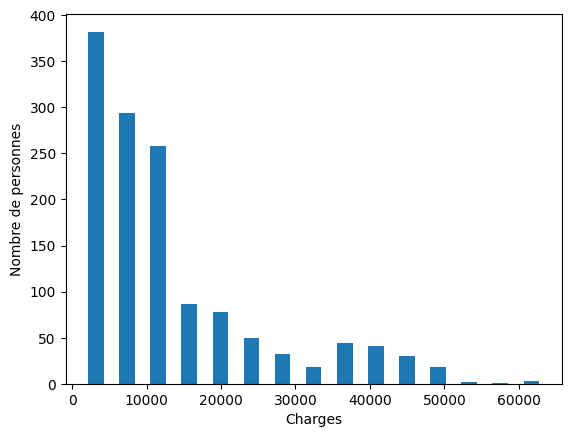

In [34]:
plt.hist(df["charges"],rwidth=.5 ,bins=15)
plt.xlabel("Charges")
plt.ylabel("Nombre de personnes")
plt.show()

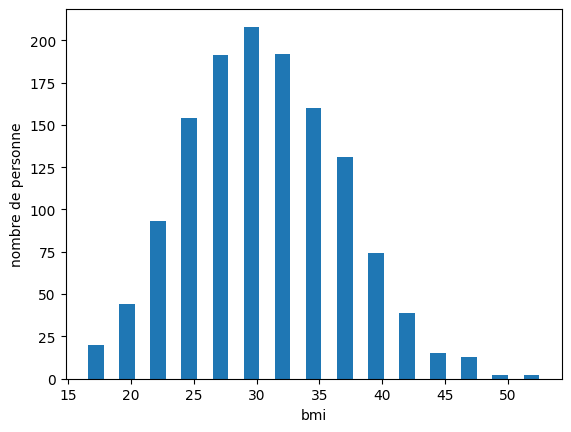

In [47]:
plt.hist(df["bmi"],rwidth=.5 ,bins=15)
plt.xlabel("bmi")
plt.ylabel("nombre de personne")
plt.show()

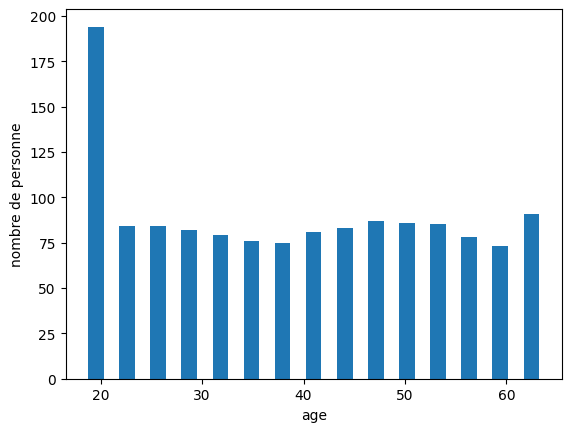

In [48]:
plt.hist(df["age"],rwidth=.5 ,bins=15)
plt.xlabel("age")
plt.ylabel("nombre de personne")
plt.yticks()
plt.show()

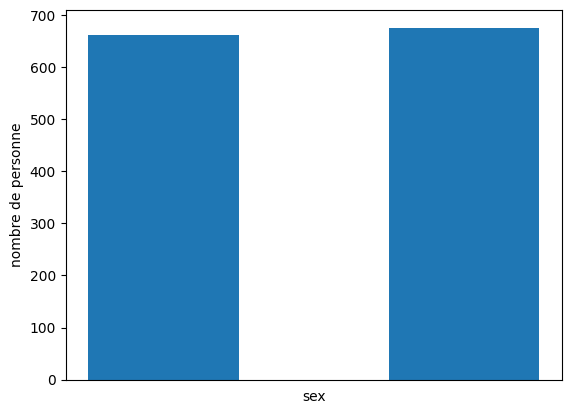

In [50]:
plt.hist(df["sex"],rwidth=.5 ,bins=2)
plt.xlabel("sex")
plt.ylabel("nombre de personne")
plt.show()

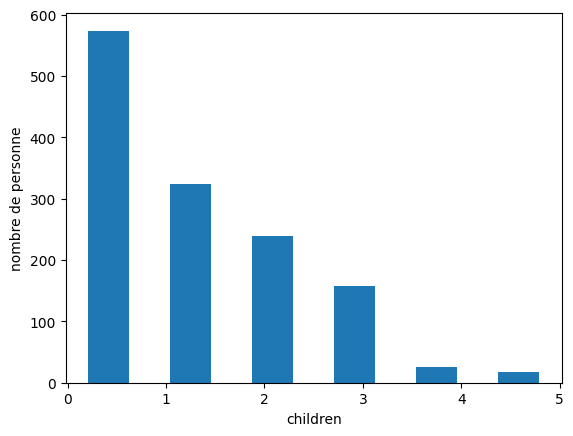

In [52]:
plt.hist(df["children"],rwidth=.5 ,bins=6)
plt.xlabel("children")
plt.ylabel("nombre de personne")
plt.show()

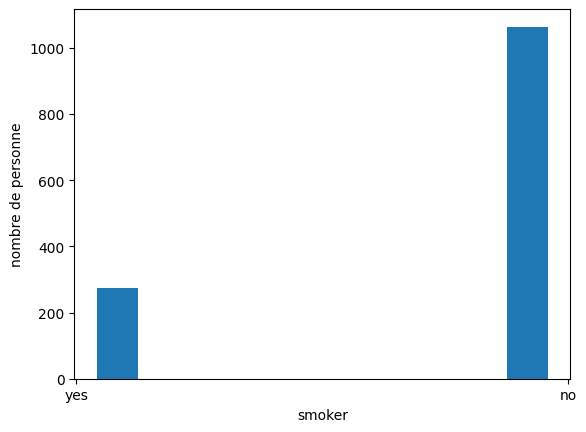

In [53]:
plt.hist(df["smoker"],rwidth=.5 ,bins=6)
plt.xlabel("smoker")
plt.ylabel("nombre de personne")
plt.show()

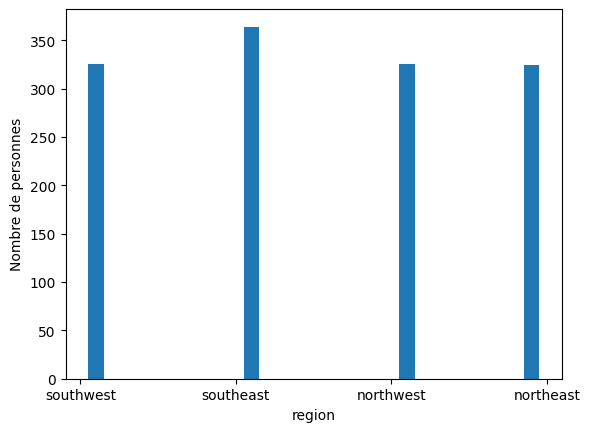

In [54]:
plt.hist(df["region"],rwidth=.5 ,bins=15)
plt.xlabel("region")
plt.ylabel("Nombre de personnes")
plt.show()

In [44]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

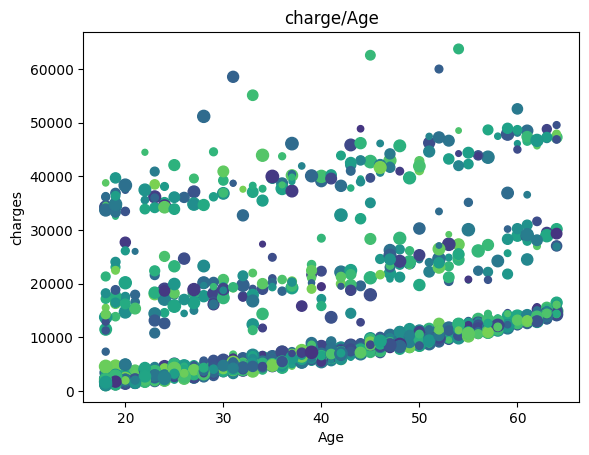

In [41]:
x = df['age']
y = df['charges']
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
plt.xlabel('Age')
plt.ylabel('charges')
plt.title('charge/Age')

plt.show()

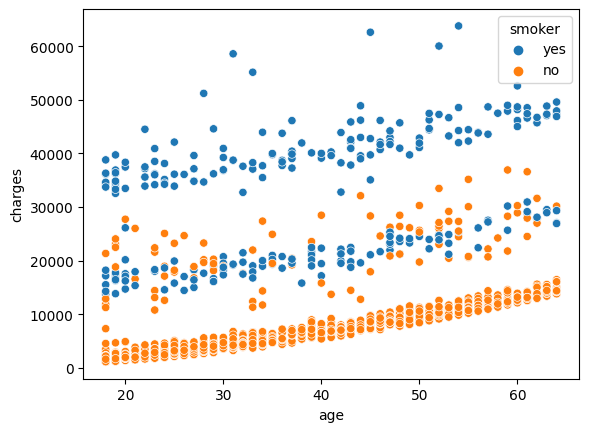

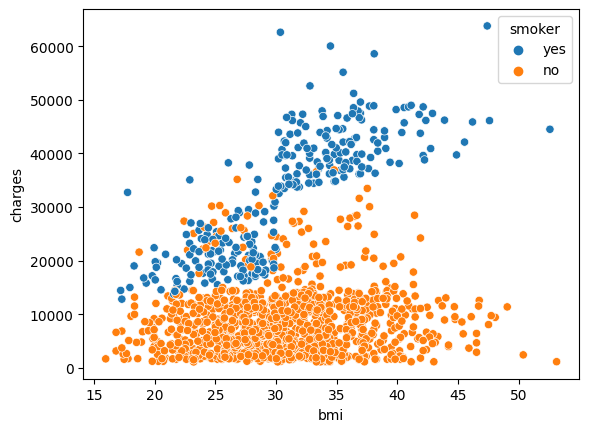

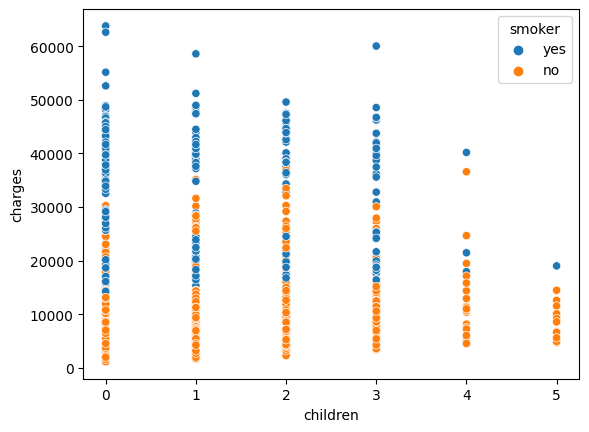

In [5]:
num_col = ['age', 'bmi', 'children']

for col in num_col :
    sns.scatterplot(data = df, x=col, y='charges', hue='smoker')
    plt.show()

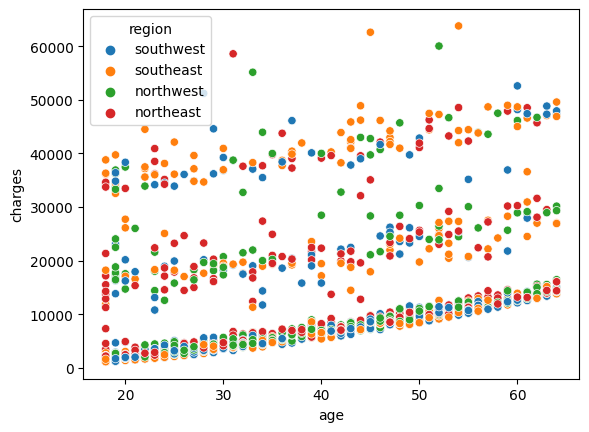

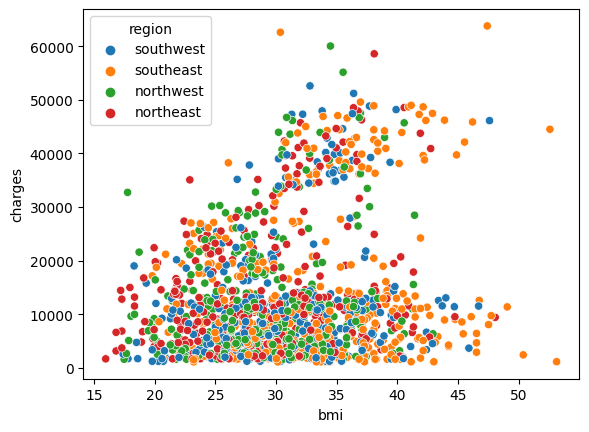

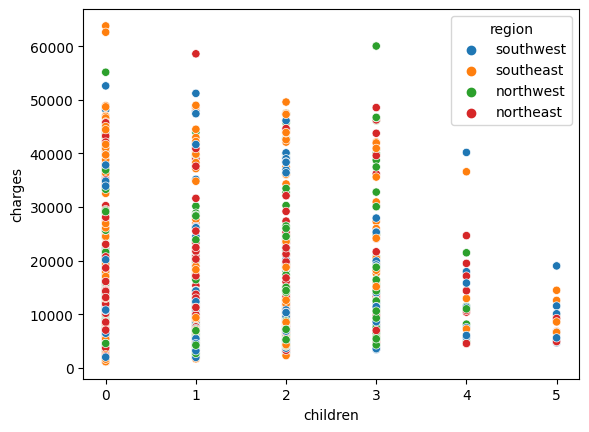

In [11]:
num_col = ['age', 'bmi', 'children']

for col in num_col :
    sns.scatterplot(data = df, x=col, y='charges', hue='region')
    plt.show()

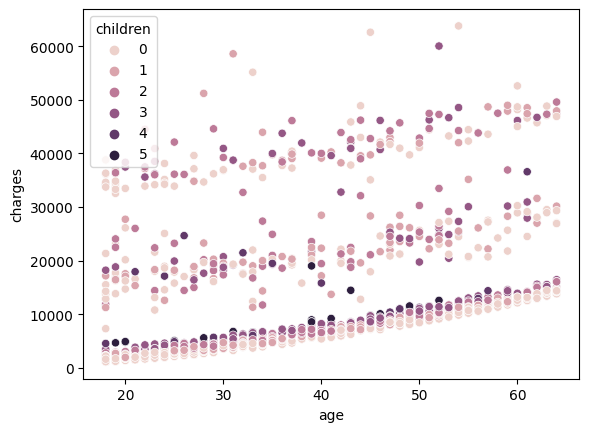

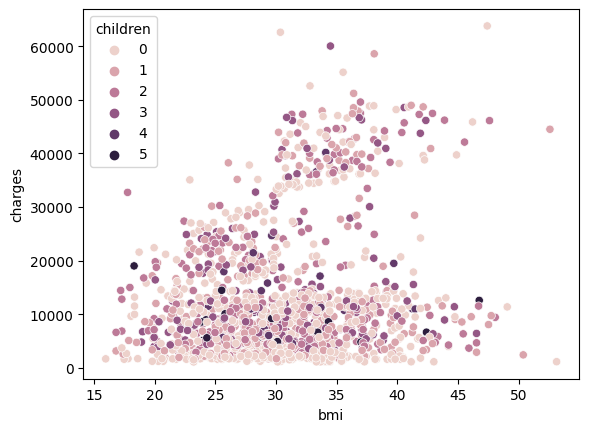

In [13]:
num_col = ['age', 'bmi']

for col in num_col :
    sns.scatterplot(data = df, x=col, y='charges', hue='children')
    plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
mask_age = (df['age']== 18) & ((df['charges']>=10000) | (df['charges']<= 20000))
df_analyse = df[mask_age]
df_analyse

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
22,18,male,34.100,0,no,southeast,1137.01100
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
...,...,...,...,...,...,...,...
1296,18,male,26.125,0,no,northeast,1708.92575
1315,18,male,28.310,1,no,northeast,11272.33139
1317,18,male,53.130,0,no,southeast,1163.46270
1334,18,female,31.920,0,no,northeast,2205.98080


In [9]:
df_analyse.describe()

,age,bmi,children,charges
count,69.0,69.000000,69.000000,69.000000
mean,18.0,31.326159,0.449275,7086.217556
std,0.0,6.970188,0.883446,10198.459989
min,18.0,15.960000,0.000000,1121.873900
25%,18.0,26.180000,0.000000,1633.044400
50%,18.0,31.350000,0.000000,2198.189850
75%,18.0,36.850000,1.000000,11272.331390
max,18.0,53.130000,4.000000,38792.685600


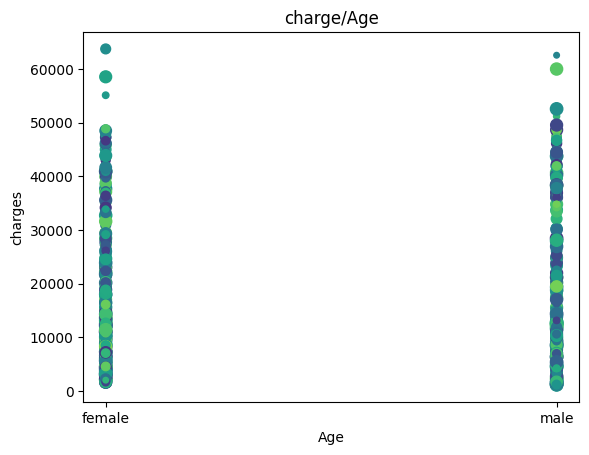

In [55]:
x = df['sex']
y = df['charges']
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)
plt.xlabel('Age')
plt.ylabel('charges')
plt.title('charge/Age')

plt.show()

In [21]:
df_ready.to_csv("brief_assurance_clean.csv",index=False)